In [1]:
import keras
keras.__version__

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [2]:
df=pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:


stopwords_special = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]



In [4]:
#to remove stop words from column: review 
import string
def remove_stop_words_punct(df, c):
    sentences = []
    output_sentences=[]
    
    for row in df[c]:
        sentence = row
        for word in stopwords_special:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)
        
    for s in sentences:
        
#         s.translate({ord(c): " " for c in ':\'-,{!'})
        element = s.replace('<br />','')
        element = element.replace('"','')
        element = element.replace(')','')
        element = element.replace('(','')
        element = element.replace('{','')
        element = element.replace('}','')
        element = element.replace('\'','')
        element = element.replace('$','')
        element = element.replace('-','')
        element = element.replace('!','')
        element = element.replace(':','')
        element = element.replace(',','')
        element = element.replace('.','')                          
        output_sentences.append(' '.join( [w for w in element.split() if len(w)>1] ))

    return output_sentences

In [5]:
sentences=remove_stop_words_punct(df, 'review')

In [6]:
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"

df['sentiment']=np.where(df['sentiment']=='positive', 1, 0)

In [7]:
labels=df['sentiment'].values.tolist()

In [8]:
# Splitting 50% of the dataset into a training set and 50% into a test set

training_portion=0.50

train_size = int(len(sentences)*training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

test_sentences = sentences[train_size:]
test_labels = labels[train_size:]


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

oov_tok = "<OOV>"
vocab_size=10000 #max_words
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
sequences = tokenizer.texts_to_sequences(train_sentences)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 140789 unique tokens.


In [12]:

data = pad_sequences(sequences, maxlen=maxlen)

trainlabels = np.asarray(train_labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', trainlabels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)#not necessary
# data = data[indices]
# labels = labels[indices]

x_train = data[:training_samples]
y_train = trainlabels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = trainlabels[training_samples: training_samples + validation_samples]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [13]:
# Pre-process the embeddings

# embeddings_index = {}

# with open("../input/glove6b/glove.6B.100d.txt") as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs


# print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [14]:
# embedding_dim = 100

# embedding_matrix = np.zeros((max_words, embedding_dim))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if i < max_words:
#         if embedding_vector is not None:
#             # Words not found in embedding index will be all-zeros.
#             embedding_matrix[i] = embedding_vector

In [33]:
# embedding_matrix

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [17]:
# we can also load the GloVe embeddings in the model in the following way:

# model.layers[0].set_weights([embedding_matrix])
# model.layers[0].trainable = False


In [26]:
# Train and evaluate


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


Epoch 1/10
7/7 [==============================] - 1s 108ms/step - loss: 0.9057 - acc: 0.5450 - val_loss: 0.7453 - val_acc: 0.5247
Epoch 2/10
7/7 [==============================] - 1s 92ms/step - loss: 0.4007 - acc: 0.8300 - val_loss: 0.7044 - val_acc: 0.5557
Epoch 3/10
7/7 [==============================] - 1s 94ms/step - loss: 0.2914 - acc: 0.9450 - val_loss: 0.7215 - val_acc: 0.5549
Epoch 4/10
7/7 [==============================] - 1s 95ms/step - loss: 0.2146 - acc: 0.9650 - val_loss: 0.7259 - val_acc: 0.5603
Epoch 5/10
7/7 [==============================] - 1s 93ms/step - loss: 0.1578 - acc: 1.0000 - val_loss: 0.7110 - val_acc: 0.5761
Epoch 6/10
7/7 [==============================] - 1s 93ms/step - loss: 0.1156 - acc: 1.0000 - val_loss: 0.8357 - val_acc: 0.5421
Epoch 7/10
7/7 [==============================] - 1s 94ms/step - loss: 0.0913 - acc: 1.0000 - val_loss: 0.7335 - val_acc: 0.5729
Epoch 8/10
7/7 [==============================] - 1s 96ms/step - loss: 0.0698 - acc: 1.0000 - va

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

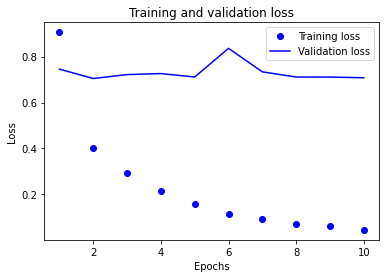

In [28]:
#Let's plot Training Vs. Validation Loss

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

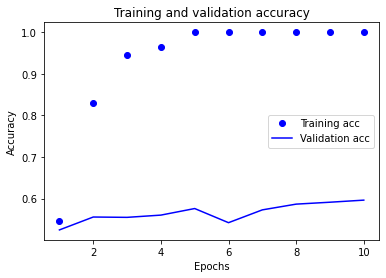

In [29]:
#Let's plot Training Vs. Validation Accuracy

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [30]:
#Get the test set ready
maxlen = 100  # We will cut reviews after 100 words
oov_tok = "<OOV>"
vocab_size=10000 #max_words
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(test_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_data = pad_sequences(test_sequences, maxlen=maxlen)
test_label = np.asarray(test_labels)

In [31]:

model.evaluate(test_data, test_label)


782/782 [==============================] - 2s 3ms/step - loss: 0.8192 - acc: 0.5057


[0.8191544413566589, 0.5056800246238708]

Clearly the model is overfitting! We get an appalling test accuracy of 50%. Working with just a handful of training samples is hard!